In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
data=pd.read_csv("/content/program_5_dataset.csv")

In [3]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [14]:
df = data.drop("Unnamed: 0", axis=1)

In [15]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
print(df.describe())

              Age         ALB         ALP         ALT         AST         BIL  \
count  615.000000  613.000000  595.000000  612.000000  613.000000  615.000000   
mean    47.408130   41.622838   68.263529   28.493627   34.731648   11.396748   
std     10.055105    5.784979   26.049129   25.498962   33.090023   19.673150   
min     19.000000   14.900000   11.300000    0.900000   10.600000    0.800000   
25%     39.000000   38.800000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   42.000000   66.200000   23.000000   25.900000    7.300000   
75%     54.000000   45.200000   80.100000   33.100000   32.900000   11.200000   
max     77.000000   82.200000  416.600000  325.300000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  615.000000  604.000000   614.000000  615.000000  614.000000  
mean     8.196634    5.368013    81.271987   39.533171   72.044137  
std      2.205657    1.133665    49.795186   54.661071    5.402

In [17]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          2
ALP         20
ALT          3
AST          2
BIL          0
CHE          0
CHOL        11
CREA         1
GGT          0
PROT         1
dtype: int64

In [18]:
# Impute missing values
df['ALB'].fillna(df['ALB'].mean(), inplace=True)
df['ALP'].fillna(df['ALP'].median(), inplace=True)
df['ALT'].fillna(df['ALT'].mean(), inplace=True)
df['AST'].fillna(df['AST'].median(), inplace=True)
df['CHOL'].fillna(df['CHOL'].mean(), inplace=True)
df['CREA'].fillna(df['CREA'].median(), inplace=True)
df['PROT'].fillna(df['PROT'].mean(), inplace=True)

# Verify that there are no more missing values
print(df.isnull().sum())

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


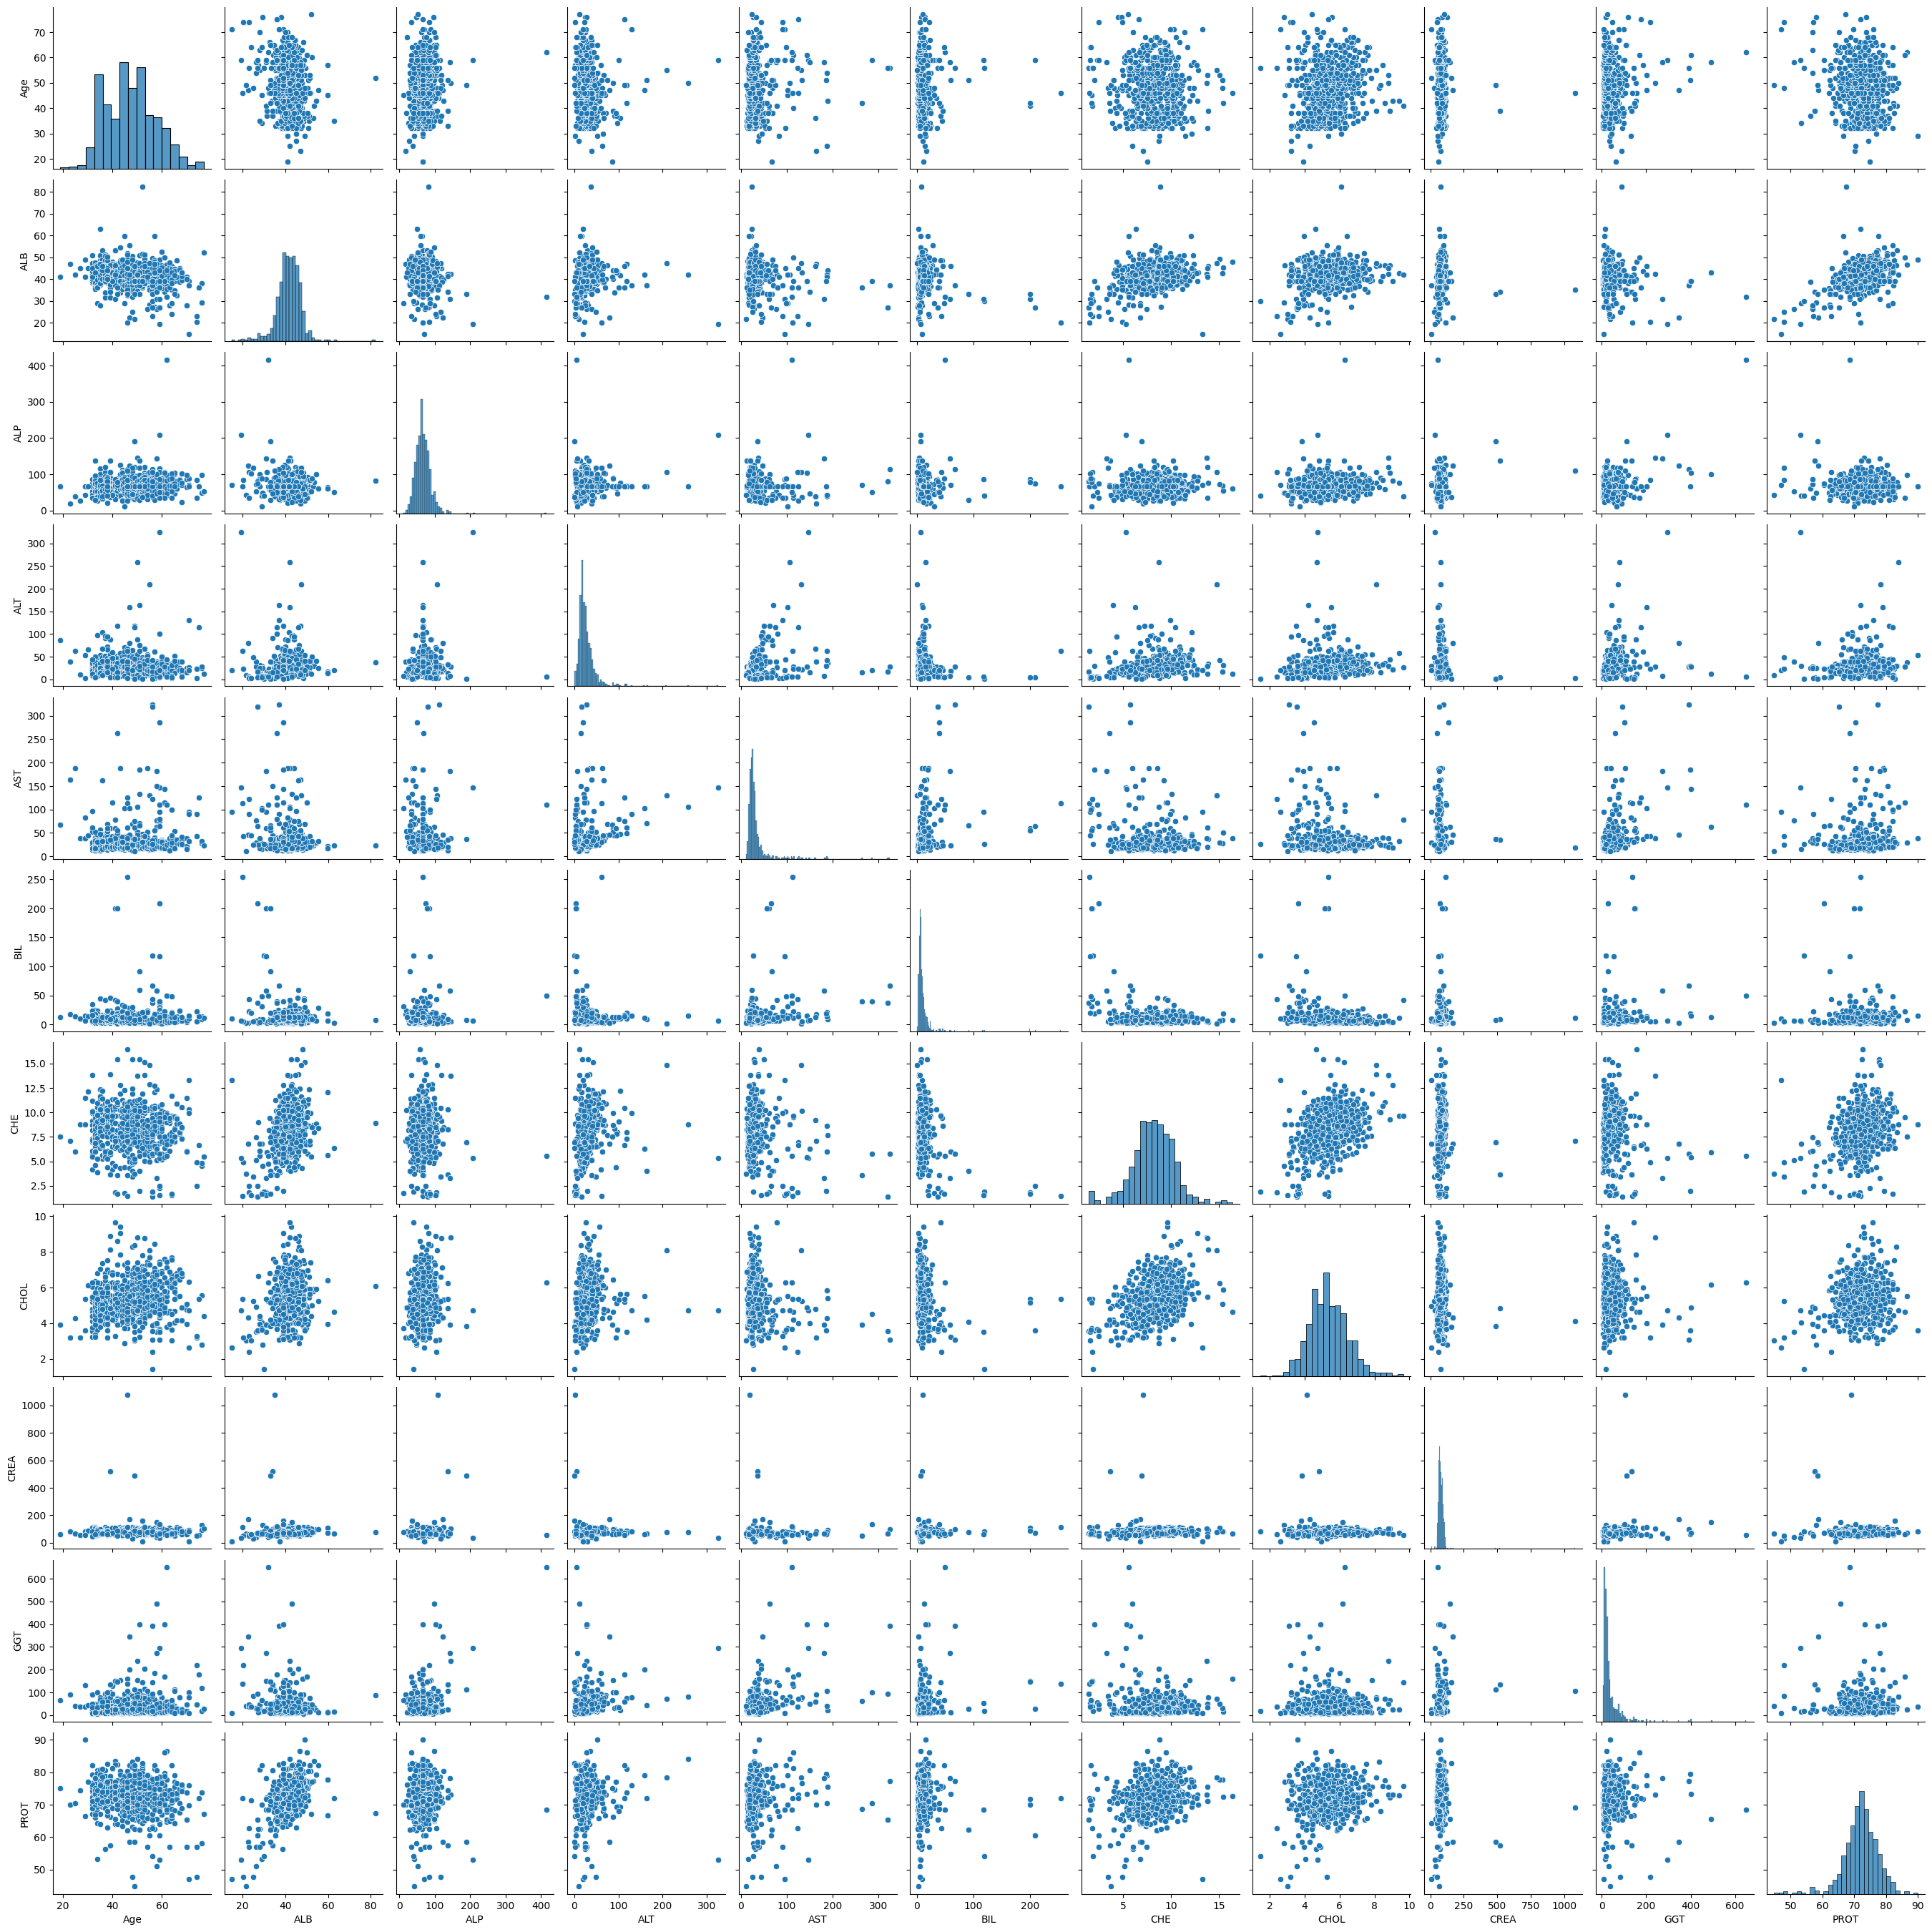

In [19]:
# Pairplot for numerical variables
sns.pairplot(df[['Age', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']])
plt.show()

<ipython-input-20-20b9d3109241>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


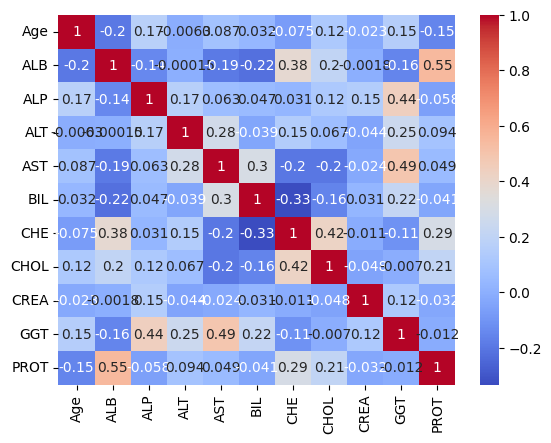

In [20]:
# Correlation heatmap
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [21]:
# Simple Linear Regression
X_simple = df[['CREA']]
y_simple = df['PROT']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y_simple, test_size=0.2, random_state=42)

# Fit the model
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

# Print intercept and coefficient
print("Intercept:", simple_model.intercept_)
print("Coefficient:", simple_model.coef_[0])

Intercept: 72.25612816106563
Coefficient: -0.003936228580240845


In [23]:
# Make predictions
y_pred_train_simple = simple_model.predict(X_train)
y_pred_test_simple = simple_model.predict(X_test)

In [24]:
# Evaluate the model
mse_train_simple = mean_squared_error(y_train, y_pred_train_simple)
mse_test_simple = mean_squared_error(y_test, y_pred_test_simple)

r2_train_simple = r2_score(y_train, y_pred_train_simple)
r2_test_simple = r2_score(y_test, y_pred_test_simple)

print("Mean Squared Error (Train):", mse_train_simple)
print("Mean Squared Error (Test):", mse_test_simple)
print("R-squared (Train):", r2_train_simple)
print("R-squared (Test):", r2_test_simple)

Mean Squared Error (Train): 28.429070250708097
Mean Squared Error (Test): 31.66021538837277
R-squared (Train): 0.0016322549221847726
R-squared (Test): -0.01051734163179252


In [26]:
# Calculate VIF
# Drop non-numerical columns and the ones mentioned in the instructions
X_vif = df.drop(columns=[ 'Category', 'Age', 'Sex', 'PROT'])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

  Feature        VIF
0     ALB  30.923000
1     ALP   9.855363
2     ALT   2.667661
3     AST   3.098081
4     BIL   1.569543
5     CHE  22.129303
6    CHOL  26.877397
7    CREA   3.745779
8     GGT   2.600208


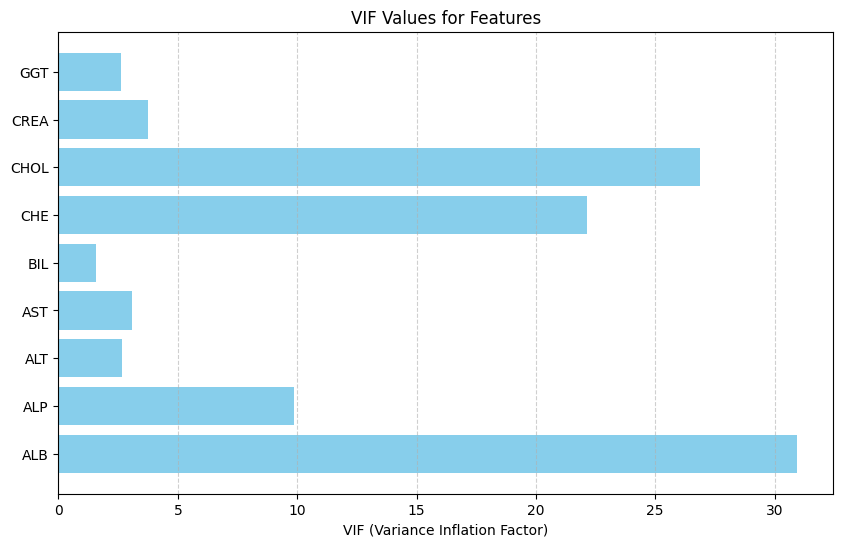

In [40]:
features = vif_data['Feature']
vif_values = vif_data['VIF']

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, vif_values, color='skyblue')
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Values for Features')
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

* Features with high VIF (ALB, CHE, CHOL) are potentially affected by multicollinearity.
* Features with low VIF (ALT, AST, BIL, CREA, GGT) are less affected by multicollinearity.
* ALP's VIF is moderately high, requiring careful consideration.

In [27]:
# Multiple Linear Regression
# Choose predictors based on VIF analysis
selected_predictors = ['ALT', 'AST', 'GGT']

X_multiple = df[selected_predictors]
y_multiple = df['PROT']

In [28]:
# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

# Fit the model
multiple_model = LinearRegression()
multiple_model.fit(X_train_multi, y_train_multi)


LinearRegression()

In [29]:
# Print intercept and coefficients
print("Intercept:", multiple_model.intercept_)
print("Coefficients:", dict(zip(selected_predictors, multiple_model.coef_)))

# Make predictions
y_pred_train_multi = multiple_model.predict(X_train_multi)
y_pred_test_multi = multiple_model.predict(X_test_multi)

Intercept: 71.51747789989226
Coefficients: {'ALT': 0.008274613577877368, 'AST': 0.0036835264124318893, 'GGT': 0.0015553480360370815}


Intercept: The intercept (71.52) represents the estimated mean value of the target variable (PROT) when all predictor variables (ALT, AST, GGT) are zero. However, interpretations involving zero values for these variables might not be practically meaningful.

ALT Coefficient (0.00827): Holding AST and GGT constant, a one-unit increase in ALT is associated with an estimated increase of 0.00827 units in the target variable (PROT).

AST Coefficient (0.00368): Holding ALT and GGT constant, a one-unit increase in AST is associated with an estimated increase of 0.00368 units in the target variable (PROT).

GGT Coefficient (0.00156): Holding ALT and AST constant, a one-unit increase in GGT is associated with an estimated increase of 0.00156 units in the target variable (PROT).

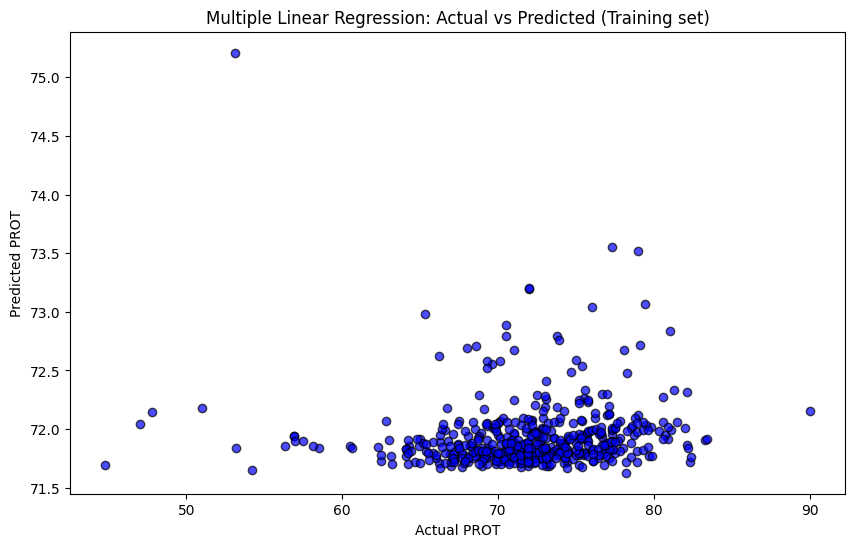

In [41]:
# Make predictions using the multiple linear regression model
y_pred_multi = multiple_model.predict(X_train_multi)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train_multi, y_pred_multi, c='blue', edgecolors='k', alpha=0.7)
plt.title('Multiple Linear Regression: Actual vs Predicted (Training set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')
plt.show()

In [30]:
# Evaluate the model
mse_train_multi = mean_squared_error(y_train_multi, y_pred_train_multi)
mse_test_multi = mean_squared_error(y_test_multi, y_pred_test_multi)

r2_train_multi = r2_score(y_train_multi, y_pred_train_multi)
r2_test_multi = r2_score(y_test_multi, y_pred_test_multi)

print("Mean Squared Error (Train):", mse_train_multi)
print("Mean Squared Error (Test):", mse_test_multi)
print("R-squared (Train):", r2_train_multi)
print("R-squared (Test):", r2_test_multi)

Mean Squared Error (Train): 28.38676091355027
Mean Squared Error (Test): 31.143496002277995
R-squared (Train): 0.003118067759590115
R-squared (Test): 0.005975088820776908


Mean Squared Error (MSE):

The MSE values are relatively high, indicating that the model doesn't fit the data well. This might be due to the limited explanatory power of the chosen predictors or the presence of non-linear relationships.

R-squared (R2):

The R-squared values are close to zero, suggesting that the model explains only a very small proportion of the variance in the target variable (PROT). This reinforces the need for further exploration or consideration of additional features.

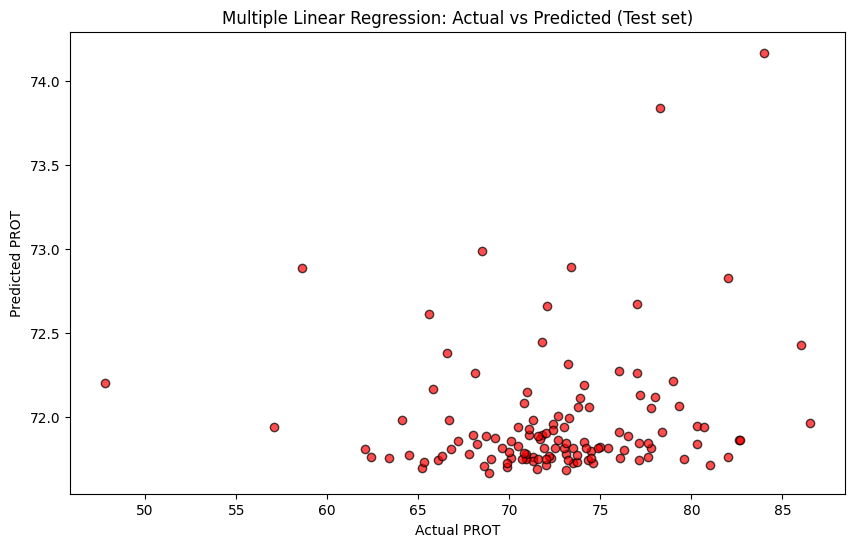

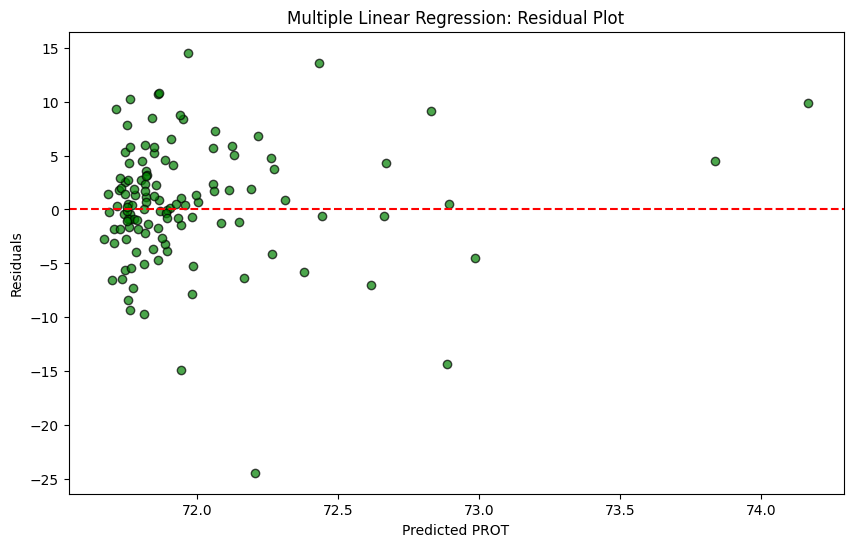

In [42]:
# Make predictions on the test set
y_pred_test_multi = multiple_model.predict(X_test_multi)

# Scatter plot for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_test_multi, c='red', edgecolors='k', alpha=0.7)
plt.title('Multiple Linear Regression: Actual vs Predicted (Test set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')
plt.show()

# Residual plot
residuals = y_test_multi - y_pred_test_multi
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test_multi, residuals, c='green', edgecolors='k', alpha=0.7)
plt.title('Multiple Linear Regression: Residual Plot')
plt.xlabel('Predicted PROT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

In [33]:
# Find the attribute with the highest VIF
highest_vif_feature = vif_data.loc[vif_data['VIF'].idxmax()]['Feature']

In [34]:
# 5. Polynomial Regression
degrees = [2, 3, 4]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(df[[highest_vif_feature]])

    X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_simple, test_size=0.2, random_state=42)

    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_poly_train)

    # Print intercept and coefficients
    print(f"\nPolynomial Regression (Degree {degree}):")
    print("Intercept:", poly_model.intercept_)
    print("Coefficients:", poly_model.coef_)

    # Make predictions
    y_poly_pred_train = poly_model.predict(X_poly_train)
    y_poly_pred_test = poly_model.predict(X_poly_test)

    # Evaluate the model
    mse_train_poly = mean_squared_error(y_poly_train, y_poly_pred_train)
    mse_test_poly = mean_squared_error(y_poly_test, y_poly_pred_test)

    r2_train_poly = r2_score(y_poly_train, y_poly_pred_train)
    r2_test_poly = r2_score(y_poly_test, y_poly_pred_test)

    print("Mean Squared Error (Train):", mse_train_poly)
    print("Mean Squared Error (Test):", mse_test_poly)
    print("R-squared (Train):", r2_train_poly)
    print("R-squared (Test):", r2_test_poly)


Polynomial Regression (Degree 2):
Intercept: 19.847585900803963
Coefficients: [ 0.          1.98784066 -0.01739451]
Mean Squared Error (Train): 16.852735410756935
Mean Squared Error (Test): 25.335851021814232
R-squared (Train): 0.408168212957602
R-squared (Test): 0.19134104084631987

Polynomial Regression (Degree 3):
Intercept: 16.362212817573884
Coefficients: [ 0.00000000e+00  2.23556791e+00 -2.29381184e-02  3.88339835e-05]
Mean Squared Error (Train): 16.84579881940881
Mean Squared Error (Test): 25.530586114921405
R-squared (Train): 0.40841181111264824
R-squared (Test): 0.18512556864579444

Polynomial Regression (Degree 4):
Intercept: 18.98369865631357
Coefficients: [ 0.00000000e+00  1.95989185e+00 -1.28369672e-02 -1.14948687e-04
  8.17484391e-07]
Mean Squared Error (Train): 16.845155402494818
Mean Squared Error (Test): 25.558028780995308
R-squared (Train): 0.40843440652951923
R-squared (Test): 0.1842496652563793


Intercept and Coefficients:

The intercept represents the estimated mean value of the target variable when all predictor variables are zero.
Coefficients indicate the change in the target variable for a one-unit change in the corresponding predictor, holding other predictors constant.

Mean Squared Error (MSE):

MSE values are relatively high, suggesting that the polynomial regression models, even with higher degrees, don't fit the data significantly better than the linear model.

R-squared (R2):

R-squared values are still relatively low, indicating that the models explain only a small proportion of the variance in the target variable.

In [35]:
# 6. Ridge Regression
alphas = np.linspace(0.1, 150, 13)
ridge_results = []

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train_multi, y_train_multi)

    # Make predictions
    y_ridge_pred_train = ridge_model.predict(X_train_multi)
    y_ridge_pred_test = ridge_model.predict(X_test_multi)

    # Evaluate the model
    mse_train_ridge = mean_squared_error(y_train_multi, y_ridge_pred_train)
    mse_test_ridge = mean_squared_error(y_test_multi, y_ridge_pred_test)

    r2_train_ridge = r2_score(y_train_multi, y_ridge_pred_train)
    r2_test_ridge = r2_score(y_test_multi, y_ridge_pred_test)

    ridge_results.append({
        'Alpha': alpha,
        'MSE_train': mse_train_ridge,
        'MSE_test': mse_test_ridge,
        'R2_train': r2_train_ridge,
        'R2_test': r2_test_ridge
    })

In [36]:
# 7. LASSO Regression
alphas_lasso = np.linspace(0.1, 100, 10)
lasso_results = []

for alpha_lasso in alphas_lasso:
    lasso_model = Lasso(alpha=alpha_lasso)
    lasso_model.fit(X_train_multi, y_train_multi)

    # Make predictions
    y_lasso_pred_train = lasso_model.predict(X_train_multi)
    y_lasso_pred_test = lasso_model.predict(X_test_multi)

    # Evaluate the model
    mse_train_lasso = mean_squared_error(y_train_multi, y_lasso_pred_train)
    mse_test_lasso = mean_squared_error(y_test_multi, y_lasso_pred_test)

    r2_train_lasso = r2_score(y_train_multi, y_lasso_pred_train)
    r2_test_lasso = r2_score(y_test_multi, y_lasso_pred_test)

    lasso_results.append({
        'Alpha': alpha_lasso,
        'MSE_train': mse_train_lasso,
        'MSE_test': mse_test_lasso,
        'R2_train': r2_train_lasso,
        'R2_test': r2_test_lasso
    })

In [37]:
# 8. Cross-validation
cv_scores = cross_val_score(multiple_model, X_train_multi, y_train_multi, cv=5, scoring='neg_mean_squared_error')
print("\nCross-Validation Mean Squared Error:", -np.mean(cv_scores))



Cross-Validation Mean Squared Error: 29.748767623711537


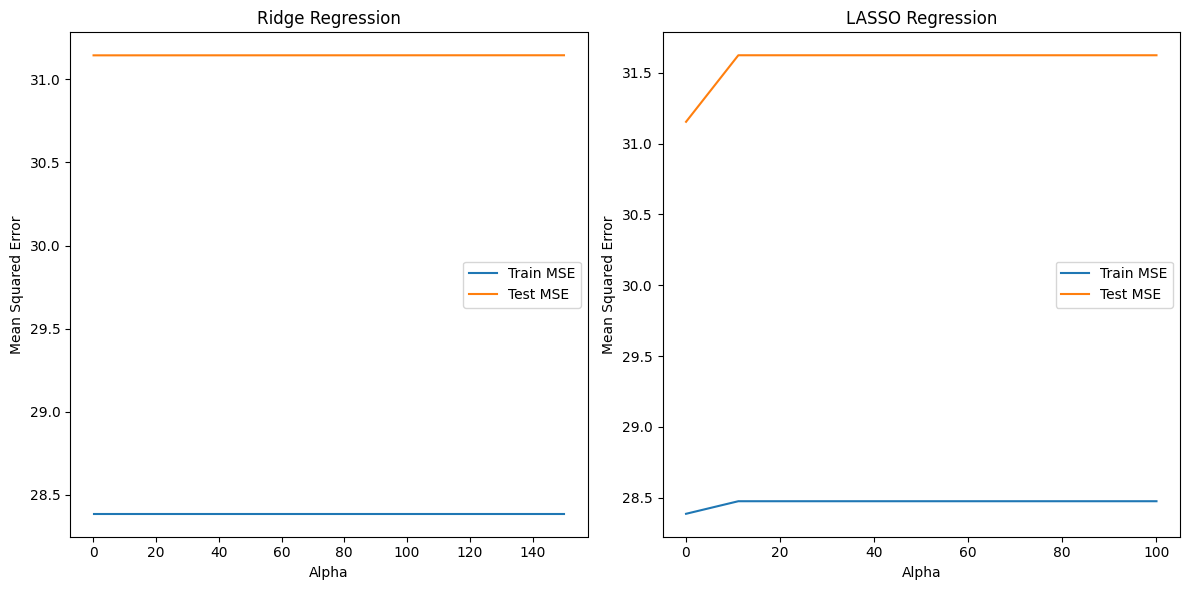

In [38]:
# 9. Comparative analysis graph
# Create a DataFrame for Ridge and LASSO results
ridge_df = pd.DataFrame(ridge_results)
lasso_df = pd.DataFrame(lasso_results)

# Plotting
plt.figure(figsize=(12, 6))

# Ridge Regression
plt.subplot(1, 2, 1)
plt.plot(ridge_df['Alpha'], ridge_df['MSE_train'], label='Train MSE')
plt.plot(ridge_df['Alpha'], ridge_df['MSE_test'], label='Test MSE')
plt.title('Ridge Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()

# LASSO Regression
plt.subplot(1, 2, 2)
plt.plot(lasso_df['Alpha'], lasso_df['MSE_train'], label='Train MSE')
plt.plot(lasso_df['Alpha'], lasso_df['MSE_test'], label='Test MSE')
plt.title('LASSO Regression')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# 10. Print intercept and coefficients for Ridge and LASSO regression
print("\nRidge Regression (Alpha =", ridge_df.loc[ridge_df['MSE_test'].idxmin()]['Alpha'], "):")
print("Intercept:", ridge_model.intercept_)
print("Coefficients:", dict(zip(selected_predictors, ridge_model.coef_)))

print("\nLASSO Regression (Alpha =", lasso_df.loc[lasso_df['MSE_test'].idxmin()]['Alpha'], "):")
print("Intercept:", lasso_model.intercept_)
print("Coefficients:", dict(zip(selected_predictors, lasso_model.coef_)))


Ridge Regression (Alpha = 0.1 ):
Intercept: 71.51760840655058
Coefficients: {'ALT': 0.008269592747060498, 'AST': 0.003682603762266265, 'GGT': 0.0015565686027075676}

LASSO Regression (Alpha = 0.1 ):
Intercept: 71.93577235772358
Coefficients: {'ALT': 0.0, 'AST': 0.0, 'GGT': 0.0}


Ridge Regression:
* Intercept and Coefficients:
  
  Similar to the multiple linear regression model, the intercept represents the estimated mean value of the target variable when all predictor variables are zero.
  
  Coefficients indicate the change in the target variable for a one-unit change in the corresponding predictor, holding other predictors constant.
  
  The Ridge regression coefficients are close to the multiple linear regression coefficients.

LASSO Regression:
* Intercept and Coefficients:
  
  LASSO tends to perform variable selection by forcing some coefficients to be exactly zero.
  
  In this case, the LASSO regression has set the coefficients for all predictors to zero, effectively removing them from the model.
  
  This can be interpreted as a form of feature selection, indicating that ALT, AST, and GGT might not significantly contribute to the model at this regularization strength.

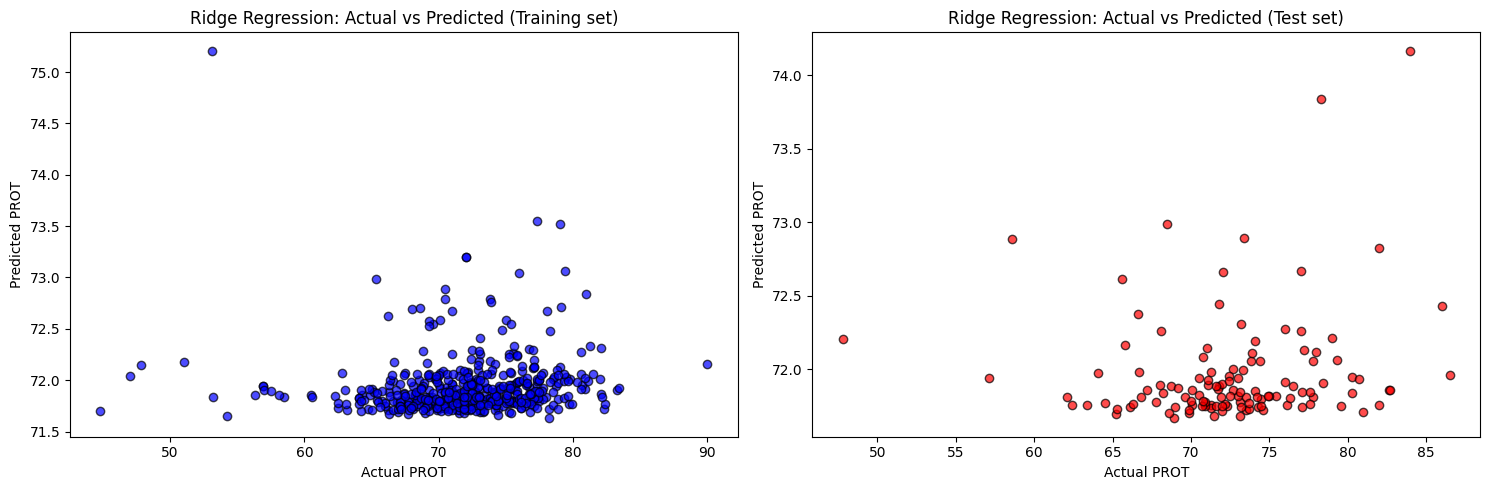

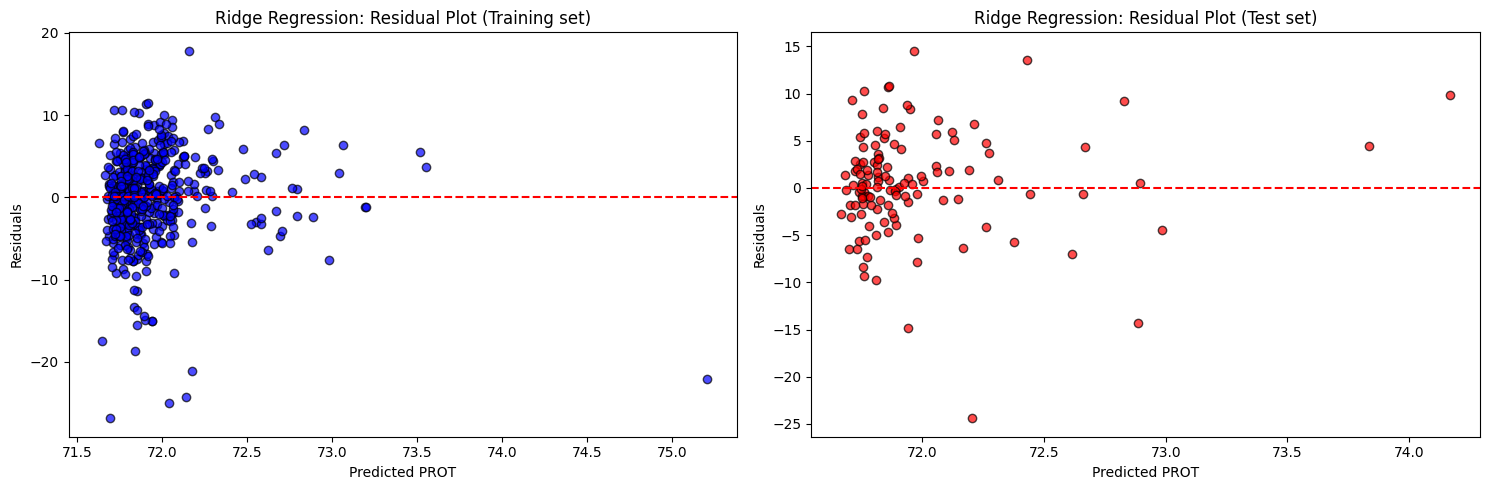

In [44]:
# Make predictions using the Ridge regression model
y_pred_ridge_train = ridge_model.predict(X_train_multi)
y_pred_ridge_test = ridge_model.predict(X_test_multi)

# Scatter plot for Ridge regression
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_multi, y_pred_ridge_train, c='blue', edgecolors='k', alpha=0.7)
plt.title('Ridge Regression: Actual vs Predicted (Training set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')

plt.subplot(1, 2, 2)
plt.scatter(y_test_multi, y_pred_ridge_test, c='red', edgecolors='k', alpha=0.7)
plt.title('Ridge Regression: Actual vs Predicted (Test set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')

plt.tight_layout()
plt.show()

# Residual plot for Ridge regression
residuals_ridge_train = y_train_multi - y_pred_ridge_train
residuals_ridge_test = y_test_multi - y_pred_ridge_test

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_ridge_train, residuals_ridge_train, c='blue', edgecolors='k', alpha=0.7)
plt.title('Ridge Regression: Residual Plot (Training set)')
plt.xlabel('Predicted PROT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_ridge_test, residuals_ridge_test, c='red', edgecolors='k', alpha=0.7)
plt.title('Ridge Regression: Residual Plot (Test set)')
plt.xlabel('Predicted PROT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()


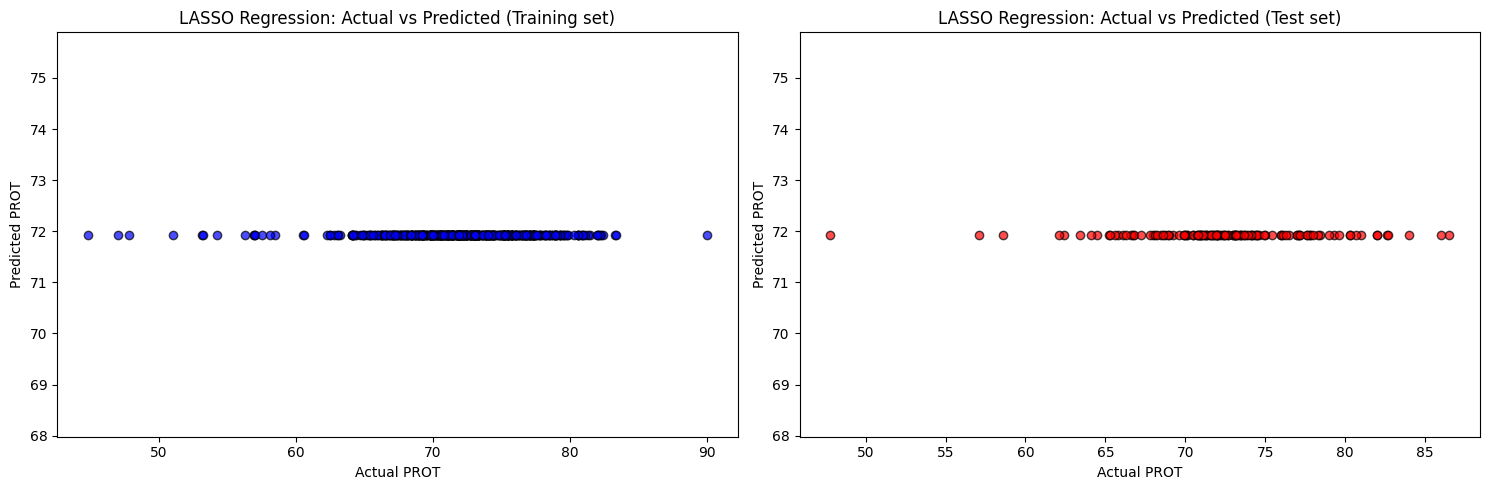

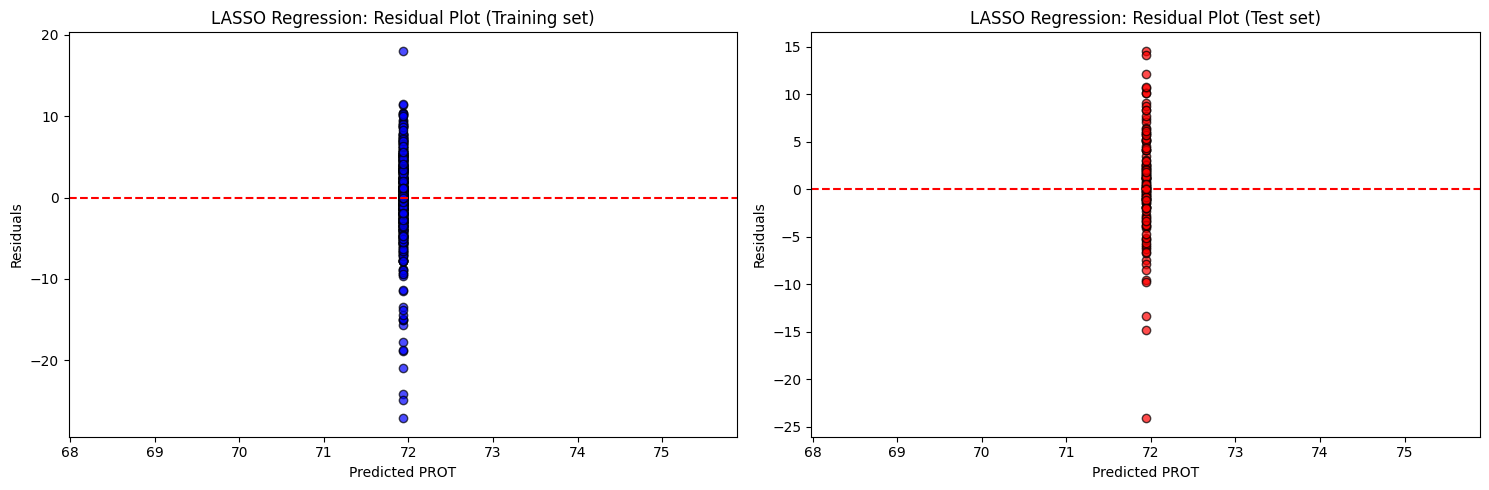

In [45]:
# Make predictions using the LASSO regression model
y_pred_lasso_train = lasso_model.predict(X_train_multi)
y_pred_lasso_test = lasso_model.predict(X_test_multi)

# Scatter plot for LASSO regression
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_train_multi, y_pred_lasso_train, c='blue', edgecolors='k', alpha=0.7)
plt.title('LASSO Regression: Actual vs Predicted (Training set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')

plt.subplot(1, 2, 2)
plt.scatter(y_test_multi, y_pred_lasso_test, c='red', edgecolors='k', alpha=0.7)
plt.title('LASSO Regression: Actual vs Predicted (Test set)')
plt.xlabel('Actual PROT')
plt.ylabel('Predicted PROT')

plt.tight_layout()
plt.show()

# Residual plot for LASSO regression
residuals_lasso_train = y_train_multi - y_pred_lasso_train
residuals_lasso_test = y_test_multi - y_pred_lasso_test

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred_lasso_train, residuals_lasso_train, c='blue', edgecolors='k', alpha=0.7)
plt.title('LASSO Regression: Residual Plot (Training set)')
plt.xlabel('Predicted PROT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.scatter(y_pred_lasso_test, residuals_lasso_test, c='red', edgecolors='k', alpha=0.7)
plt.title('LASSO Regression: Residual Plot (Test set)')
plt.xlabel('Predicted PROT')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()
